# Assignment 1
This assignment consists of one notebook file. Each exercise is graded using *hidden* tests. If you pass these tests then you are rewarded *full points* for that exercise; if your code fails the tests in any way then you will get *no points* for that exercise. Make sure to **read the rules** before you start the assignment.

## Rules
For this assignment the following rules apply:

**General**
 * The assignment should be completed in **groups of two or three** (enroll in a group on Brightspace).
 * Any kind of intergroup discussion will be considered fraud and both the parties will be punished.
 * All code must be written intra group. All external help, with the exception of Python/library documentation and the lecture slides, will be considered fraud.
 * Do not use libraries that implement the assignment for you (e.g. don't use `cv2.cvtColor` to do color to gray conversion). Ask a TA if you are unsure.

**Grading**
 * Each exercise is graded using additional hidden tests. These tests will check your solution for different (unseen) inputs.
 * If the tests pass without error (warnings are allowed) then you receive full points.
 * If the tests fail or raise an exception for any reason then you receive 0 points.
 * If a test cell takes more than five minutes to complete then this is considered an error.
 * Do not make any assumptions on the input data (such as resolution) unless specified otherwise. Doing so may result in the tests failing and thus 0 points.
 * Your grade is computed as $\frac{\text{points}}{\text{max_points}} * 9 + 1$ and will be rounded to the closest 0.5 point.
 * Submit your code to Brightspace as a zip file containing only the notebook (`*.ipynb`) files.
 * **Do not rename the notebook files**
 
**Late Submissions**
 * Late submissions must be submitted *as soon as possible* to the "Assignment 1 - Late Submissions" assignment on Brightspace.
 * The following penalty will be applied: $\text{adjusted grade} = \text{grade} - 1 - \lceil\frac{\text{minutes late}}{10}\rceil$

<br />
 
**Before you submit**, make sure that you are not accidentaly using any global variables. Restart the kernel (wiping all global variables) and run the code from top to bottom by clicking "Kernel" => "Restart & Run all" in the menu bar at the top.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import os
import cv2
import sys
sys.path.append("../../")
import helpers

# Load a image, resize (optional) and convert it to a normalized floating point format (map values between 0.0 and 1.0).
#image = helpers.imread_normalized_float("name_of_image_file.png")

# Show a single image
#helpers.show_image(image, "Text above image")
    
# Showing multiple images in a grid (with a given number of rows and columns):
# helpers.show_images({"Text above figure1": figure1, "Text above figure2": "figure2"}, nrows, ncols)

## Color Images
Light consists of a combination of electromagnatic waves at different wave lengths. Our eyes can capture a part of this spectrum using "cones" which capture short, medium, and long wavelengths. These absorption spectra map to roughly red, green, and blue respectively. Hence, the colors of pixels are typically stored as a combination of red, green, and blue.

interactive(children=(FloatSlider(value=1.0, description='Red', max=1.0), FloatSlider(value=1.0, description='…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
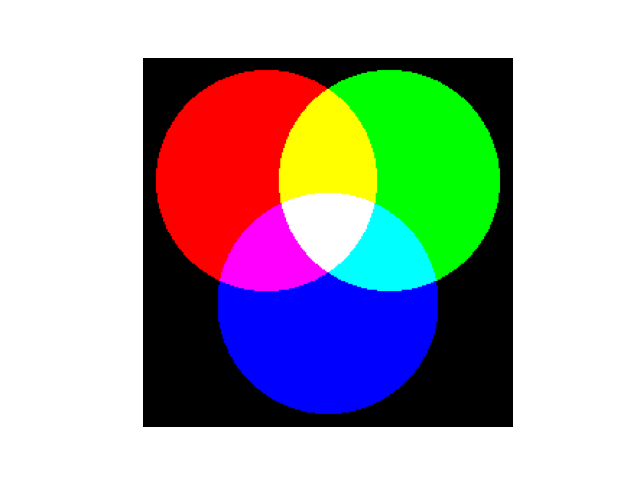

In [2]:
import color_spaces
color_spaces.draw_rgb_circle_diagram(256)

## Exercise 1 (1 point)
RGB (Red, Green, Blue) maps nicely to the human visual system. However, for image progressing we sometimes prefer other color spaces such as YIQ which separate color from luminance. The formula to convert from RGB to YIQ is as follows:

$$
\begin{bmatrix}
Y \\
I \\
Q
\end{bmatrix}
=
\begin{bmatrix}
0.299 & 0.587 & 0.114 \\
0.595716 & -0.274453 & -0.321263 \\
0.211456 & -0.522591 & 0.311135
\end{bmatrix}
\begin{bmatrix}
R \\
G \\
B
\end{bmatrix}
$$


Your job is to implement a function which converts any image from RGB to the YIQ color space.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
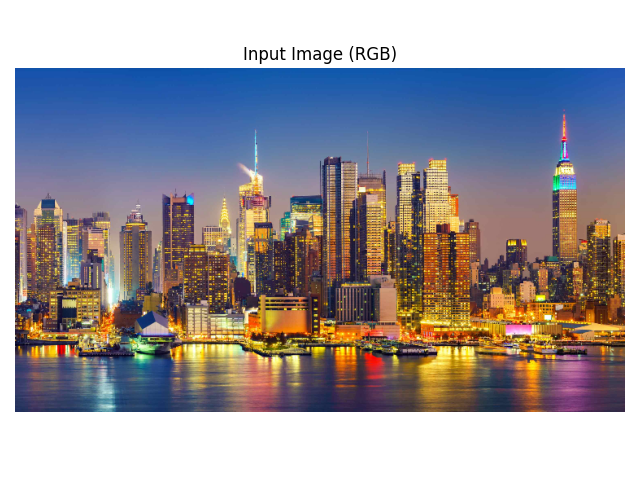

YOUR SOLUTION:


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
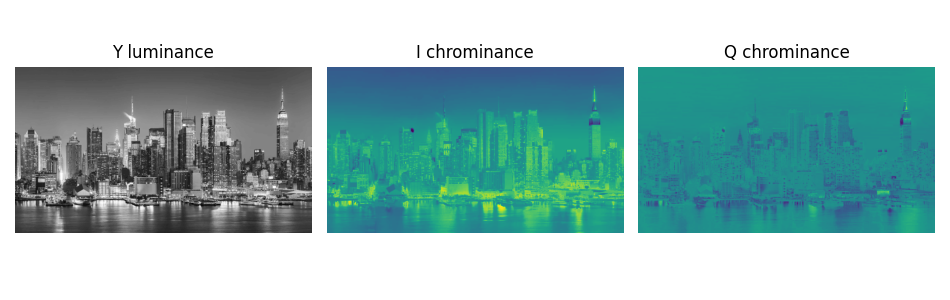

In [4]:
def rgb_to_yiq(image):
    temp = np.matrix([[0.299, 0.587, 0.114], [0.595716, -0.274453, -0.321263 ], [0.211456, -0.522591, 0.311135] ])
    out = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            out[i][j] = np.matmul(temp, image[i][j])
    return out
    

new_york_image = helpers.imread_normalized_float(os.path.join(helpers.dataset_folder, "week1", "rework", "newyork.jpg"), 0.25) # Downscale by 4 in each direction = 16 times less pixels.
new_york_image_yiq = rgb_to_yiq(new_york_image)

helpers.show_image(new_york_image, "Input Image (RGB)")

print("YOUR SOLUTION:")
fig, axis = plt.subplots(1,3, figsize=(9.5, 3))
plot_names = ["Y luminance", "I chrominance", "Q chrominance"]
for i, ax in enumerate(axis):
    ax.set_title(plot_names[i])
    ax.imshow(new_york_image_yiq[:,:,i], cmap=("gray" if i==0 else "viridis"))
    ax.axis("off")
fig.tight_layout()

### Testing your solution of exercise 1
The grading tests for this solution are hidden. However, you should be able to get a good idea of whether the code is doing what you expect it to do by comparing the results to that you work out by hand. For a complicated image this is hard, so we provide a small test "image" that you can use. Do not worry if the results of your function are off by a very tiny amount ($<0.0001$), this is to be expected due to the limited precision with which computers can represent floating point numbers.

*You are free to modify the provided tests in any way you want. They are not part of the grading*

In [5]:
test_image = np.array([[
    [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [0, 1, 1], [1, 1, 1]
]])
yiq_image = rgb_to_yiq(test_image)

np.set_printoptions(precision=3) # Print at most 3 decimals
for i in range(test_image.shape[1]):
    rgb = test_image[:,i,:]
    yiq = yiq_image[:,i,:]
    print(f"RGB: {rgb}")
    print(f"YIQ: {yiq}")
    print("")

RGB: [[0 0 0]]
YIQ: [[0. 0. 0.]]

RGB: [[1 0 0]]
YIQ: [[0.299 0.596 0.211]]

RGB: [[0 1 0]]
YIQ: [[ 0.587 -0.274 -0.523]]

RGB: [[0 0 1]]
YIQ: [[ 0.114 -0.321  0.311]]

RGB: [[1 1 0]]
YIQ: [[ 0.886  0.321 -0.311]]

RGB: [[0 1 1]]
YIQ: [[ 0.701 -0.596 -0.211]]

RGB: [[1 1 1]]
YIQ: [[ 1.000e+00  0.000e+00 -5.551e-17]]



In [ ]:
# DO NOT REMOVE THIS CELL

# Contrast
You might be familiar with the various filters on your phone that make the colors in your images stand out more. These filters do so by increasing the contrast of the image. Contrast is defined as the difference between the pixel with the lowest and the pixel with the highest intensity. Let's consider the image of this car for example. The "colors" (this is in gray scale) are washed out: the image has a low contrast.

Another way we can reason about the contrast of an image is by examining the intensity histogram. A histogram is a collection of bins, each of which stores the frequency of occurances of a certain value range. In the case of images, the values are a color or intensity; so a histogram tells us for each bin how many pixels have an intensity within that range. Next to the car we have plotted a  histogram of the image. Notice how almost all pixels have an intensity between 0.3 and 0.7. The contrast is thus only $0.7-0.3=0.4$.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
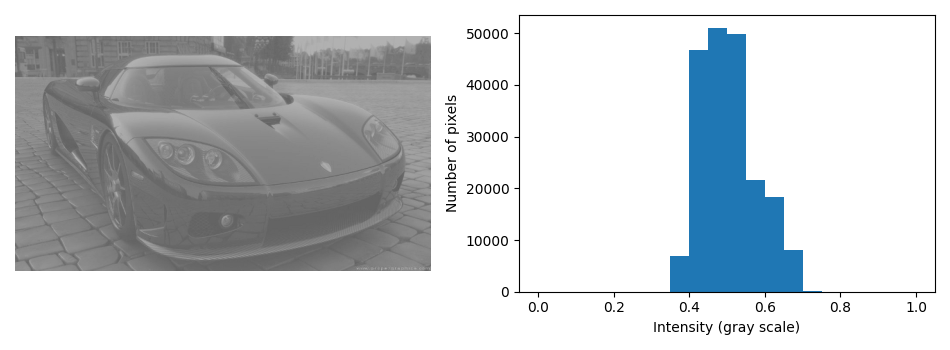

In [6]:
car_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "colors", "car.png"))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=helpers.default_fig_size)
ax1.imshow(car_image, cmap="gray", vmin=0, vmax=1)
ax1.set_axis_off()
ax2.hist(car_image.flatten(), 20, range=(0, 1))
ax2.set_xlabel("Intensity (gray scale)")
ax2.set_ylabel("Number of pixels")
plt.tight_layout()
plt.show()

## Exercise 2 (1 point)
A simple way to increase the contract of an image is through Automatic Contrast Adjustment. Automatic Contrast Adjustment "stretches" the contrast by linearly interpolating the intensity values such that the new min/max intensity of the image lies inside a new target range. Implement a function that stretches the contrast such that the new intensities range from/to the given minimum/maximum values.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
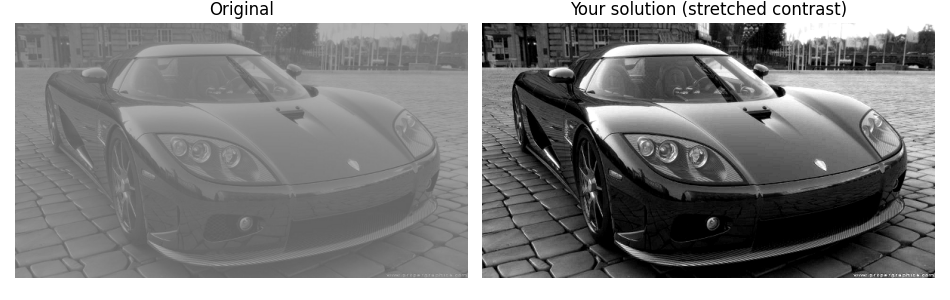

In [8]:
def constrast_stretch(gray_image, target_minimum_intensity, target_maximum_intensity):
    image = np.zeros(gray_image.shape)
    image[:][:] = target_minimum_intensity + (gray_image[:][:]-np.min(gray_image))*(target_maximum_intensity-target_minimum_intensity)/(np.max(gray_image)-np.min(gray_image))
    return image

car_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "colors", "car.png"))
car_image_stretched = constrast_stretch(car_image, -0.2, 1.2)
helpers.show_images({ "Original": car_image, "Your solution (stretched contrast)": car_image_stretched }, nrows=1, ncols=2)

### Testing your solution of exercise 2
You can verify whether you think your solution is working by analyzing the histogram of the output image for different minimum/maximum target intensities. Do the results match your expectation?

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
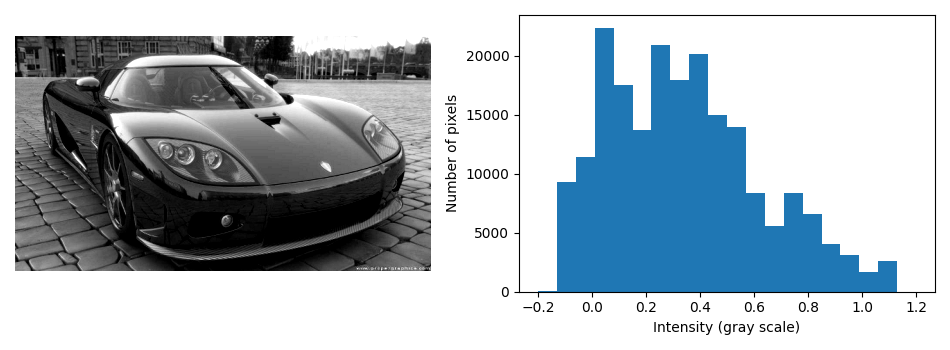

In [9]:
target_minimum_intensity = -0.2
target_maximum_intensity = 1.2

car_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "colors", "car.png"))
car_image_stretched = constrast_stretch(car_image, target_minimum_intensity, target_maximum_intensity)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=helpers.default_fig_size)
ax1.imshow(car_image_stretched, cmap="gray", vmin=0, vmax=1)
ax1.set_axis_off()
ax2.hist(car_image_stretched.flatten(), 20)
ax2.set_xlabel("Intensity (gray scale)")
ax2.set_ylabel("Number of pixels")
plt.tight_layout()
plt.show()

In [ ]:
# DO NOT REMOVE THIS CELL

## Exercise 3 (1 point)
In a real application contrast enhancement should work without the intervention of the user. A naive approach would be to always map the input image to a range of $0.0$ and $1.0$. However, this fails in cases where the input image already has a couple of pixels that reach close to $0.0$ and $1.0$. These pixels are not representative of the whole image and prevent proper stretching with the naive approach.

![Modified Auto Contrast](images/modified_auto_contrast.png)

Modified Auto-Contrast tries to alleviate this issue by saturating a given percentage ($p_\text{lo}, p_\text{hi}$) of pixels at the lower and upper ends respectively. Saturating means that those pixels may exceed the range of $[0, 1]$ after stretching. This is achieved by computing the pixel values $a'_\text{lo}$ and $a'_\text{hi}$ (see lecture slides & image above) for which $p_{lo}$ / $p_\text{hi}$ percentage of the pixels is lower or higher respectively.

Implement the auto contrast function described above. Clamp the result such that the output pixels lie in the range of $[0, 1]$.

**Tip**: `np.percentile` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)) may help you to compute $a'_\text{lo}$ and $a'_\text{hi}$.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
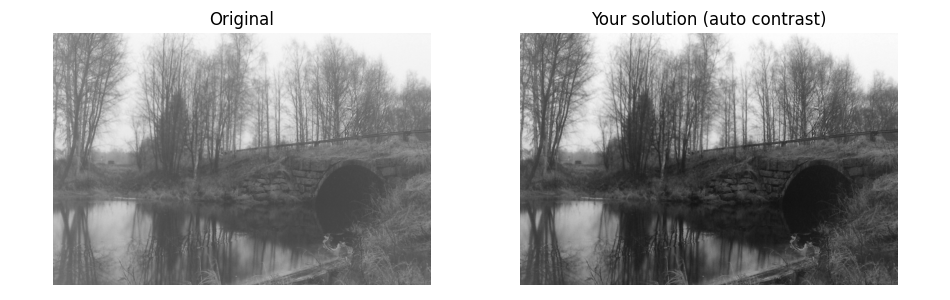

In [12]:
def auto_contrast(gray_image, p_lo, p_hi):
    a_low = np.percentile(np.min(gray_image), p_lo)
    a_high = np.percentile(np.max(gray_image), p_hi)
    a_min = 0.0
    new_image = np.zeros(gray_image.shape)
    new_image[:][:] = a_min + (gray_image[:][:] - a_low)*(1/ (a_high-a_low))
    return new_image

car_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "colors", "bridge.png"))
car_image_stretched = auto_contrast(car_image, 5, 20)
helpers.show_images({ "Original": car_image, "Your solution (auto contrast)": car_image_stretched }, nrows=1, ncols=2)

### Testing your solution of exercise 3
A good way to verify your solution is by creating a very simple test input (e.g., as provided for exercise 1) and checking the resulting histogram. Try to come up with an easy test case to verify whether your solution is correct.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
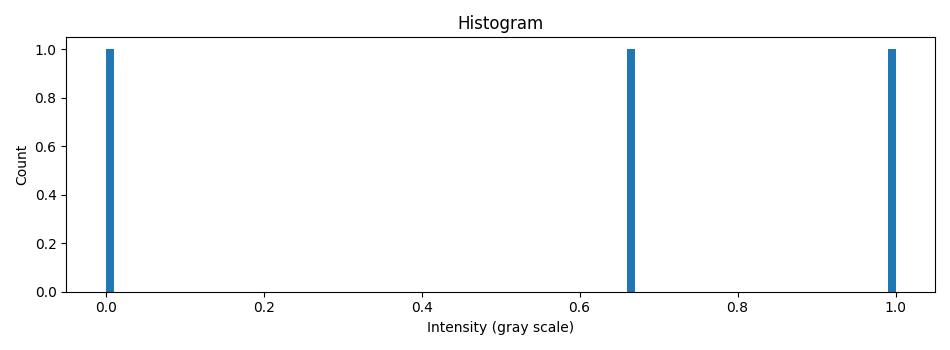

In [13]:
input_image = np.array([22, 4, 16]) # REPLACE THIS WITH YOUR TEST INPUT
output_image = auto_contrast(input_image, 10, 10)

fig, ax = plt.subplots(1, 1, figsize=helpers.default_fig_size)
ax.set_title("Histogram")
ax.hist(output_image, 100)
ax.set_xlabel("Intensity (gray scale)")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
# DO NOT REMOVE THIS CELL

# Image Filters
Apart from very simple per-pixel operations (such as color inversion) we can also design filters that take into account a neighbourhood around a pixel. A popular way of formulating and applying these filters is through the use of the convolution operator. The convolution operator applies a weighted sum to the surrounding pixels for each output pixel. The weights of the weighted sum are organized in an array (called kernel). The kernel is centered around the pixel that is currently computed (hence the size of the kernel should always be uneven) - compare the slides on box filtering.

## Exercise 4 (1 point)
The basic Laplace filter computes the differences between a central pixel and the weighted average of the neighboring pixels. This difference, multiplied by some weight, can be added or subtracted from the original image to smooth or sharpen the image respectively.

Implement the two functions that smoothen or sharpen the input image using the Laplace filter with the given weight. Use `scipy.signal.correlate2d(image, kernel, mode="same")` to apply your convolution (recall the similarities between *correlate* and *convolve* mentioned in the lecture). More information on the Laplace filter can be found in the lecture slides.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
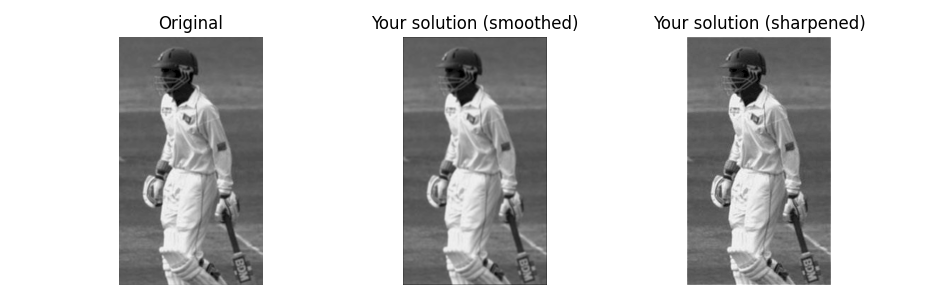

In [16]:
def laplace_smooth(gray_image, weight):
    laplace = np.matrix([[0,1,0], [1,-4,1], [0,1,0]])
    result = np.zeros(gray_image.shape)
    kernel = 1/4*weight*laplace
    test = scipy.signal.convolve2d(gray_image, kernel, mode="same")
    result = gray_image+test
    return result

def laplace_sharpen(gray_image, weight):
    laplace = np.matrix([[0,1,0], [1,-4,1], [0,1,0]])
    result = np.zeros(gray_image.shape)
    kernel = 1/4*weight*laplace
    test = scipy.signal.convolve2d(gray_image, kernel, mode="same")
    result = gray_image-test
    return result
    
cricket_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "blurry.png"))
smoothed_image = laplace_smooth(cricket_image, 5)
sharpened_image = laplace_sharpen(cricket_image, 5)
helpers.show_images({
    "Original": cricket_image,
    "Your solution (smoothed)": smoothed_image,
    "Your solution (sharpened)": sharpened_image
}, nrows=1, ncols=3)

In [17]:
# Makes sure that the image you output has the same dimensions as the input
cricket_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "blurry.png"))
smoothed_image = laplace_smooth(cricket_image, 5)
sharpened_image = laplace_sharpen(cricket_image, 5)
assert(smoothed_image.shape == cricket_image.shape)
assert(sharpened_image.shape == cricket_image.shape)


## Separable Convolution
Linear convolution filters can become quite expensive to execute because their performance grows with the filter size. In 2D this means that if we double the horizontal & vertical resolution then we quadrupal the number of operations required to execute the filter.

Some convolution filters are separable, meaning that they can be separated into a vertical and horizontal component. For this we use of the associative property of convolution, namely that: $(a \circledast b) \circledast c = a \circledast (b \circledast c)$. In this case the kernel can be decomposed as the result of a convolution of a horizontal and vertical (1D) kernel. Applying these two 1D kernels to the original input dataset ($a$ in the previous example) will give the same result as applying a convolution with the full 2D kernel.

The performance advantage comes from the fact that a $MxN$ kernel is now decomposed into a $Mx1$ and $1xN$ kernel. This reduces the number of operations that need to be performed per pixel from $M \cdot N$ to $M + N$.

### Exercise 5 (1 point)
Break down the following smoothing convolution kernel into a horizontal and vertical component. The result of convolution with those two 1D kernels should be the same as a convolution with the 2D kernel.
$$
\frac{1}{22}
\begin{bmatrix}
1 & 3 & 1 \\
3 & 6 & 3 \\
1 & 3 & 1
\end{bmatrix}
$$

In [22]:
horizontal_kernel = np.array([
    [1, 3, 1]
])
vertical_kernel = np.array([
    [1],
    [3],
    [1],
])

### Testing your solution of exercise 5
A convolution with the 1D kernels should result in the same output as a single convolution with the 2D kernels.

In [21]:
assert(horizontal_kernel.shape == (1, 3))
assert(vertical_kernel.shape == (3, 1))

## Non-linear filters
With convolutions we can easily express and apply linear filters. However, not all image filters are linear. An example of a non-linear filters are the minimum, maximum and median filters. As the names suggest, these filters return the minimum, maximum and median values of the region of $NxN$ pixels surrounding the center pixel. The median filter is an effective way of removing "salt and pepper" from images.

To prevent confusion, the following image demonstrates a the size of a $3x3$ filter (red border) around the center pixel (blue). Your solution should work for any filter size of $NxN$ where $N$ is an odd number.

<div>
<img src="images/filter_3x3.png" width="50%"/>
</div>

### Exercise 6 (2 points)
Implement the filters that compute the minimum, maximum and median values respectively inside the $N x N$ region surrounding each pixel. You may assume that the functions will only be called for odd values of $N$. You do not need to handle the case where $N$ is even. At the edges of the image the filter may contain pixels outside of the image. Ignore those pixels and only consider the valid ones (e.g,. taking the min/max/median only of valid pixels).

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
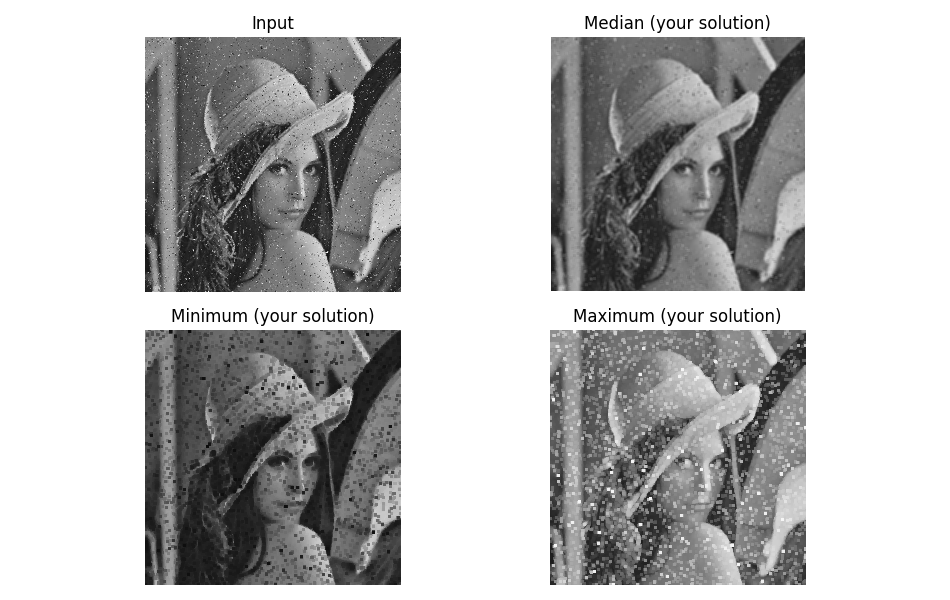

In [25]:
def minimum_filter(gray_image, N):
    out = gray_image.copy()
    test = np.pad(array=out, pad_width=N//2, mode='constant', constant_values=255)
    step = N//2
    height, width = out.shape
    for x in range(N//2,height+N//2):
        for y in range(N//2,width+N//2):
            t= []
            for z in range(-step, step+1):
                for j in range(-step, step + 1):
                    t.append(test[x + z][y + j])
            minimum = min(t)
            out[x-N//2][y-N//2]=minimum
    return out

def maximum_filter(gray_image, N):
    out = gray_image.copy()
    test = np.pad(array=out, pad_width=N//2, mode='constant', constant_values=0)
    height, width = out.shape
    step = N//2
    for x in range(N//2,height+N//2):
        for y in range(N//2,width+N//2):
            t= []
            for z in range(-step, N//2+1):
                for j in range(-step, N//2 + 1):
                    t.append(test[x + z][y + j])
            minimum = max(t)
            out[x-N//2][y-N//2]=minimum
    return out
    
    return out

def median_filter(gray_image, N):
    out = gray_image.copy()
    test = np.pad(array=out, pad_width=N//2, mode='constant', constant_values=255//2)
    height, width = out.shape
    step = N//2
    for x in range(N//2,height+N//2):
        for y in range(N//2,width+N//2):
            t= []
            for z in range(-step, N//2+1):
                for j in range(-step, N//2 + 1):
                    t.append(test[x + z][y + j])
            minimum = np.mean(t)
            out[x-N//2][y-N//2]=minimum
    return out

lena_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "lena_salt_pepper.png"), scale=0.5)
minimum_image = minimum_filter(lena_image, 3)
maximum_image = maximum_filter(lena_image, 3)
median_image = median_filter(lena_image, 3)
helpers.show_images({
    "Input": lena_image,
    "Median (your solution)": median_image,
    "Minimum (your solution)": minimum_image,
    "Maximum (your solution)": maximum_image
}, nrows=2, ncols=2)

### Testing your solution of exercise 6
We provide a couple of basic tests to verify that your functions return images of the correct size and that they don't accidentaly modify the input image. There are two hidden test cells which will test minimum/maximum filters (1 point) and the median filter (1 point).

You can add your own tests in the top code cell. Again: try to think of a couple of very simple test cases that you can verify by hand.

In [ ]:
# Add any additional tests you want to perform here

In [ ]:
input_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "lena_salt_pepper.png"), scale=0.5)
input_image_copy = input_image.copy()
minimum_image = minimum_filter(lena_image, 5)
maximum_image = maximum_filter(lena_image, 5)
median_image = minimum_filter(lena_image, 5)
assert(helpers.SSD_per_pixel(input_image, input_image_copy) == 0.0) # Your function should not modify the input image
assert(input_image.shape == minimum_image.shape)
assert(input_image.shape == maximum_image.shape)
assert(input_image.shape == median_image.shape)

In [ ]:
# DO NOT REMOVE THIS CELL

In [ ]:
# DO NOT REMOVE THIS CELL

# Extra Exercises (Bilateral Blur)
The previous exercises are enough to get you a passing grade. However, to get a $10$ you need to show that you have mastered the topic. Therefore, we introduce the following extra exercises which are considered a bit more challenging. You need to complete these without the help of the teaching assistants (TAs). **You not allowed to ask the TAs for help with the extra exercises**. However, you can report bugs by sending us an e-mail at `vdp-cs-ewi@tudelft.nl`.

### Exercise 7 (1 points)
Gaussian is a commonly used filter to blur images. Implement a function that returns a 2D Gaussian kernel as was described in the lecture. Take the simple approach and evaluate the Gaussian function once for each kernel weight rather than integrating. *Normalize* the result such that weights sum up to $1.0$. The size of the kernel $N$ is guaranteed to be an odd number.

In [ ]:
def gaussian_blur_kernel2D(standard_deviation, N):
    # Return kernel of size NxN
    # YOUR CODE HERE
    raise NotImplementedError()

std = 3
input_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "racoon.jpg"), 0.5)
blurred_image = scipy.signal.correlate2d(input_image, gaussian_blur_kernel2D(std, 1+6*std), mode="same")
helpers.show_images({ "Input": input_image, "Your solution": blurred_image }, nrows=1, ncols=2)

### Testing your solution of exercise 7
If you implemented exercise 7 correctly then your solution should look blurry. Do not worry about a dark edge around the image; this is caused by the correlation/convolution (`scipy.signal.correlate2d`) operation reading black values outside the image. We provide a couple of basic tests to ensure that some of the basic requirements are met.

In [ ]:
# Basic check to verify that the returned type is a numpy array of the correct size.
std = 4
N = 6*std+1
kernel = gaussian_blur_kernel2D(std, N)
assert(type(kernel) == np.ndarray) # np.array
assert(kernel.shape == (N, N))

# DO NOT REMOVE THIS CELL

### Assignment 8 (2 points)
As described in the lecture, a bilateral filter allows us to blur an image while maintaining sharp edges. The bilateral blur combines two different filters: a spatial blur and an intensity based filter.

$$
J(x) = \frac{1}{k(x)} \sum_y^{N \times N} f(x, y) g(I(x) - I(y)) I(y)
$$

Here $J(x)$ is the output color of pixel $x$, $y$ is a pixel in the $NxN$ neighbourhood of $x$, $f(x, y)$ is a spatial Gaussian filter (see exercise 7), and $k(x)$ is a normalization term (see lecture slides). $g(...)$ is a 1 dimensional Gaussian filter which assigns weights based on the similarity in intensity between $x$ and $y$. When a neighbouring pixel $y$ has a significantly different color/intensity than pixel $x$ then it is assigned a low weight. This intensity based filtering attempts to prevent blurring over large discontinuities in the image.

Implement the intensity filter part of the bilateral blur (effectively a bilateral filter with $f(x, y) = 1$). Again, you may assume that $N$ is an odd number. Ignore neighbours $y$ that fall outside of the image (do not include them in the sum).

In [ ]:
def bilateral_intensity_filter(image, intensity_standard_deviation, N):
    # Return image that filtered using the intensity based Gaussian filter. Do not apply a spatial filter f(x)=1
    # YOUR CODE HERE
    raise NotImplementedError()

input_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "racoon.jpg"), 0.3)
intensity_blurred_image = bilateral_intensity_filter(input_image, 0.2, 7)
std = 2
box_blurred_image = cv2.blur(input_image, (7, 7))
helpers.show_images({
    "Input": input_image,
    "Bilateral intensity (your solution)": intensity_blurred_image,
    "Box blur": box_blurred_image
}, nrows=1, ncols=3)

### Testing your solution to exercise 8
Your bilateral blur should blur while retaining strong discontinuities in intensity/color such as the eyes of the racoon. In comparison a regular (box) blur will blur over any edges.

We provide a couple of simple tests to check if the image you return has the correct size and type. In the cell below you can add your own tests. Try to come up with some simple scenarios (small images) to verify whether your implementation works as expected.

In [ ]:
# Add your own tests here.

In [ ]:
# Basic check to verify that the returned type is a numpy array of the correct size.
image_copy = input_image.copy()
blurred_image = bilateral_intensity_filter(image_copy, 0.2, 7)
assert(type(blurred_image) == np.ndarray) # np.array
assert(blurred_image.shape == input_image.shape)
assert((image_copy == input_image).all()) # Function should not modify the input

# DO NOT REMOVE THIS CELL

### Assignment 9 (1 point)
Extend your implementation of assignment 8 by adding a spatial Gaussian filter to create a full bilateral filter implementation. You can call the function that you implemented in exercise 7 to generate the Gaussian filter kernel; it will be replaced by the reference solution when grading.

In [ ]:
def bilateral_filter(image, intensity_standard_deviation, spatial_standard_deviation, N):
    # YOUR CODE HERE
    raise NotImplementedError()

input_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "racoon.jpg"), 0.3)
spatial_std = 2
bilateral_blurred_image = bilateral_filter(input_image, 0.2, spatial_std, 1+6*spatial_std)
gaussian_blurred_image = cv2.GaussianBlur(input_image, (1+6*spatial_std, 1+6*spatial_std), spatial_std)
helpers.show_images({
    "Input": input_image,
    "Bilateral (your solution)": bilateral_blurred_image,
    "Gaussian blur": gaussian_blurred_image
}, nrows=1, ncols=3)

### Testing your solution to exercise 9
Your bilateral blur should blur while retaining strong discontinuities in intensity/color such as the eyes of the racoon. In comparison a Gaussian blur will blur over any edges.

We provide a couple of simple test cases to check if the image you return has the correct size and type.

In [ ]:
# Basic check to verify that the returned type is a numpy array of the correct size.
image_copy = input_image.copy()
blurred_image = bilateral_filter(image_copy, 0.2, 1, 7)
assert(type(blurred_image) == np.ndarray) # np.array
assert(blurred_image.shape == input_image.shape)
assert((image_copy == input_image).all()) # Function should not modify the input

# DO NOT REMOVE THIS CELL